## 相关设置

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # 一个cell显示多输出

pd.set_option('display.max_rows', 100)  # 设置最大显示100行
pd.set_option('display.max_columns', 100)  # 设置最大显示100列

## 查看数据

In [2]:
titanic = pd.read_csv("./train.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
titanic.describe() # 按列统计特征
titanic.info()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


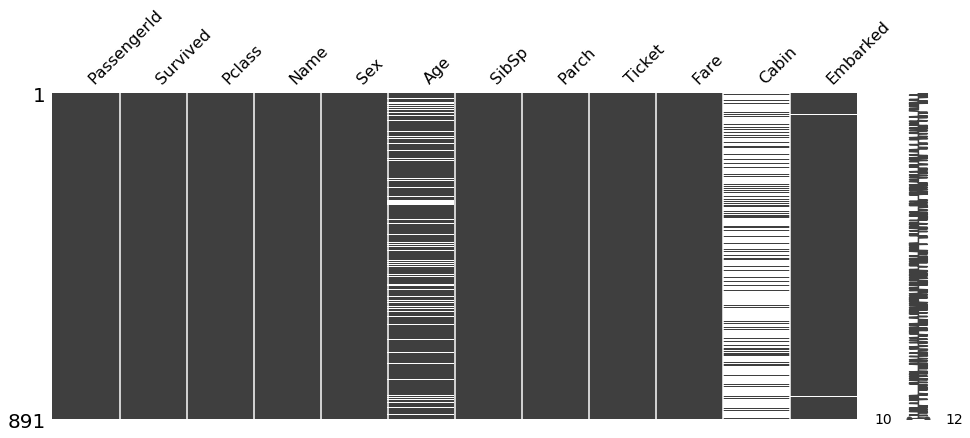

In [4]:
msno.matrix(titanic, figsize=(16, 6))

## 数据预处理

In [5]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic.describe()
titanic['Age'].isnull()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [6]:
print(titanic['Sex'].unique()) # 查看Sex特征有哪些值

# loc定位到目标行，对Sex特征进行独热编码
titanic.loc[titanic['Sex'] == 'male', 'Sex'] = 0 # 另Sex等于male那行的Sex值为0
titanic.loc[titanic['Sex'] == 'female', 'Sex'] = 1 # 另Sex等于female那行的Sex值为1

['male' 'female']


In [7]:
print(titanic['Embarked'].unique())
titanic['Embarked'] = titanic['Embarked'].fillna('S')  # S数量多，可以用S补充缺失值
titanic.loc[titanic['Embarked'] == 'S', "Embarked"] = 0
titanic.loc[titanic['Embarked'] == 'C', "Embarked"] = 1
titanic.loc[titanic['Embarked'] == 'Q', "Embarked"] = 2

['S' 'C' 'Q' nan]


In [8]:
print(titanic['Embarked'].unique())

[0 1 2]


## 线性回归模型

In [9]:
from sklearn.linear_model import LinearRegression # 导入线性回归的类，采用二分类进行分类预测
from sklearn.model_selection import KFold # K折交叉验证，取平均，调参

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"] # 输入机器学习算法的特征

alg = LinearRegression() # 初始化线性回归类
kf = KFold(n_splits=3, random_state=1) # KFold类实例化
# kf.get_n_splits(titanic) # 交叉验证集的拆分迭代次数

predictions = []

# 有3次for循环，每次建立一个回归模型
for train, test in kf.split(titanic):
    train_predictors = (titanic[predictors].iloc[train,:]) # 取出训练数据
    train_target = titanic["Survived"].iloc[train] # 获取到数据集中交叉分类好的标签，即是否活了下来
    alg.fit(train_predictors, train_target) # 训练模型
    test_predictions = alg.predict(titanic[predictors].iloc[test,:]) # 检验模型误差
    predictions.append(test_predictions)

S:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
predictions = np.concatenate(predictions, axis=0) # 转换成数组，才能比较大小

# 使用线性回归得到的结果是在区间[0,1]上的某个值，需要将该值转换成0或1
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

print("测试数据的总数量：", len(predictions))
print("正确的数量：", sum(predictions == titanic["Survived"]))
accuracy = sum(predictions == titanic["Survived"]) / len(predictions)
print("准确率为：", accuracy)

测试数据的总数量： 891
正确的数量： 700
准确率为： 0.7856341189674523


## 逻辑回归模型

In [11]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

alg = LogisticRegression(random_state=1, solver='liblinear') # 初始化逻辑回归类

# 逻辑回归交叉验证
score = model_selection.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
print("准确率为：", score.mean())

准确率为： 0.7901234567901234


## 建立特征工程，分析已有特征，再添加一些特征

In [12]:
# 第一个特征：亲属数量
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"]
# 第二个特征：名字长度
titanic["NameLength"] = titanic["Name"].apply(lambda x:len(x))
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,NameLength
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0,1,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1,1,51
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0,1,44
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,0,0,21
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,0,0,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,0,3,40
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,1,0,21


In [13]:
import re

def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name) # \.匹配.(转义)
    if title_search:
        return title_search.group(1)
    return ""

titles = titanic["Name"].apply(get_title)
print(pd.value_counts(titles))

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8,
                 "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

for k, v in title_mapping.items():
    titles[titles == k] = v

print(pd.value_counts(titles))

titanic["Title"] = titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Capt          1
Don           1
Countess      1
Jonkheer      1
Lady          1
Mme           1
Ms            1
Sir           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


## 特征选择

SelectKBest(k=5, score_func=<function f_classif at 0x0000021CDB637DC8>)

<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x21cdb72b648>,
 <a list of 10 Text xticklabel objects>)

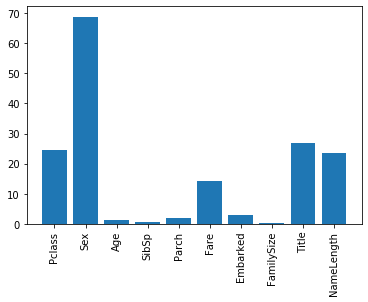

NameError: name 'RandomForestClassifier' is not defined

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif # 特征选择库
import matplotlib.pyplot as plt # 画出直方图，分析特征的权重

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]

selector = SelectKBest(f_classif, k=5) # f_classif：基于方差分析的检验统计f值，根据k个最高分数选择功能
selector.fit(titanic[predictors], titanic["Survived"])

scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
kf = model_selection.KFold(n_splits=3, random_state=1)
scores = model_selection.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=kf)
print("随机森林模型的准确率：" + str(scores.mean()))

## 集成多个分类器

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=50, max_depth=6), ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','NameLength','Title']],
    [LogisticRegression(random_state=1, solver='liblinear'), ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','NameLength','Title']]
]

kf = KFold(n_splits=3, random_state=1)

predictions = []

for train, test in kf.split(titanic):
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []

    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)

    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2

    test_predictions[test_predictions <= 0.5] = 0
    test_predictions[test_predictions > 0.5] = 1
    predictions.append(test_predictions)

predictions = np.concatenate(predictions, axis=0)

accuracy = sum(predictions == titanic["Survived"]) / len(predictions)
print(accuracy)

S:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

0.8294051627384961
